# BasicTauHybridSolver

### Imports

In [1]:
import sys
import os
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
model = MichaelisMenten()


### Run Model and plot

In [4]:
%time results = model.run(solver=BasicTauHybridSolver())

CPU times: user 2.73 s, sys: 7.83 ms, total: 2.74 s
Wall time: 2.74 s


model.run creates a Results object with a list of Trajectory objects. Results makes use of .plot() to make matplotlib graphs as well as .plotplotly() in order to create more advanced interactable plotly graphs. Plotly graphs can only be displayed in Jupyter Notebooks.

To set an attribute in matplotlib, include an argument of the form: 
    attribute='value'
See the parameter xscale='log' in the next cell. This is equivalent to including the python code: 
    figure.xscale('log')

To pass an argument to plotly, simply include it in the call to Results.plotplotly(). See the parameter xaxis_type='log' in the subsequent cell.

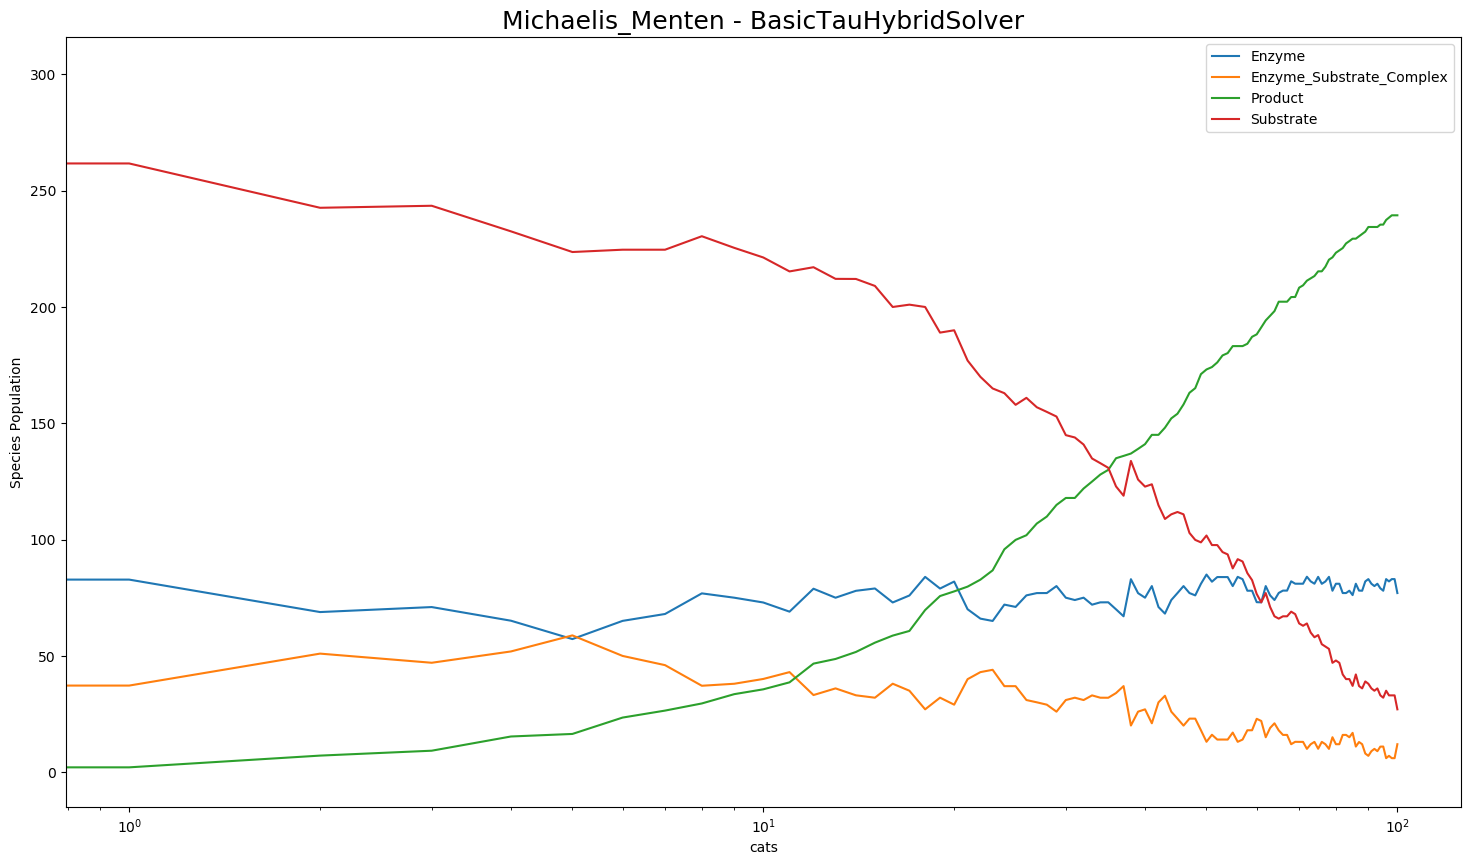

In [17]:
results.plot(xscale='log',xaxis_label='Custom X Label')

In [6]:
results.plotplotly(xaxis_type='log')

plot() and plotplotly() take optional arguments for custom labels and titles. The included_species_list may be used to limit which species are included in the graph.

Additionally, plot() and plot_std_dev_range() (the matplotlib graphers) include the optional figsize keyword which takes a tuple of the form figsize = (width,height).

Lastly, plot() has the style keyword which can be used to define which matplotlib style the graph uses. A complete list of possible styles can be found at https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html. 

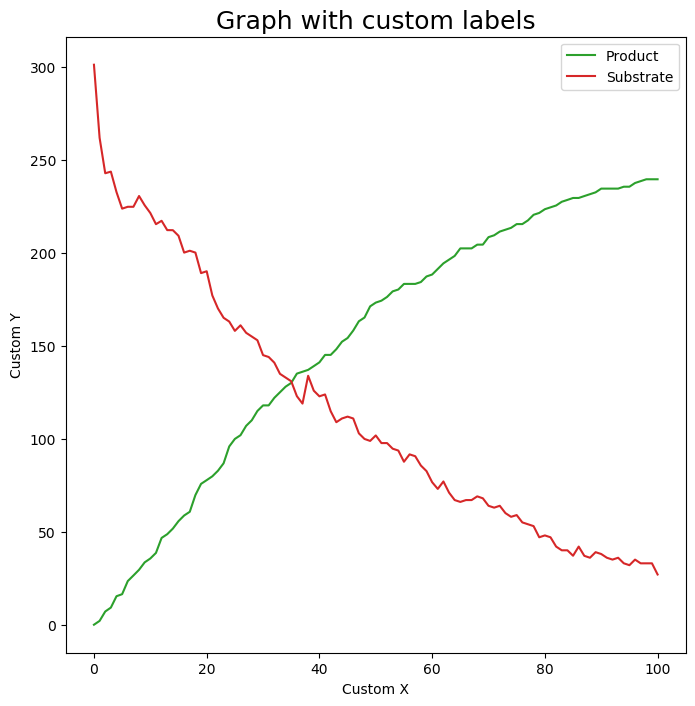

In [7]:
results.plot(xaxis_label ="Custom X", yaxis_label ="Custom Y", title = "Graph with custom labels", show_legend=True,figsize= (8,8),included_species_list=['Product','Substrate'])

plot() also includes the save_png keyword which may be set to True in order to save the matplotlib graph as a png file. plotplotly() does not support the save_png keyword however plotly graphs may be saved inline by clicking on the camera icon in the top right. 

### Ploting multiple runs 

The number_of_trajectories specifies how many times you would like to run the solver. When model.run is ran with multiple trajectories, an EnsembleResults list containing each results dict is returned. 

In [8]:
%time results_many_trajectories = model.run(solver=BasicTauHybridSolver(),number_of_trajectories=5)

CPU times: user 14 s, sys: 19 µs, total: 14 s
Wall time: 14 s


EnsembleResults have access to plot() and plotplotly() as well as the multiple_graphs keyword. By default, multiple trajectories are displayed in a single graph.

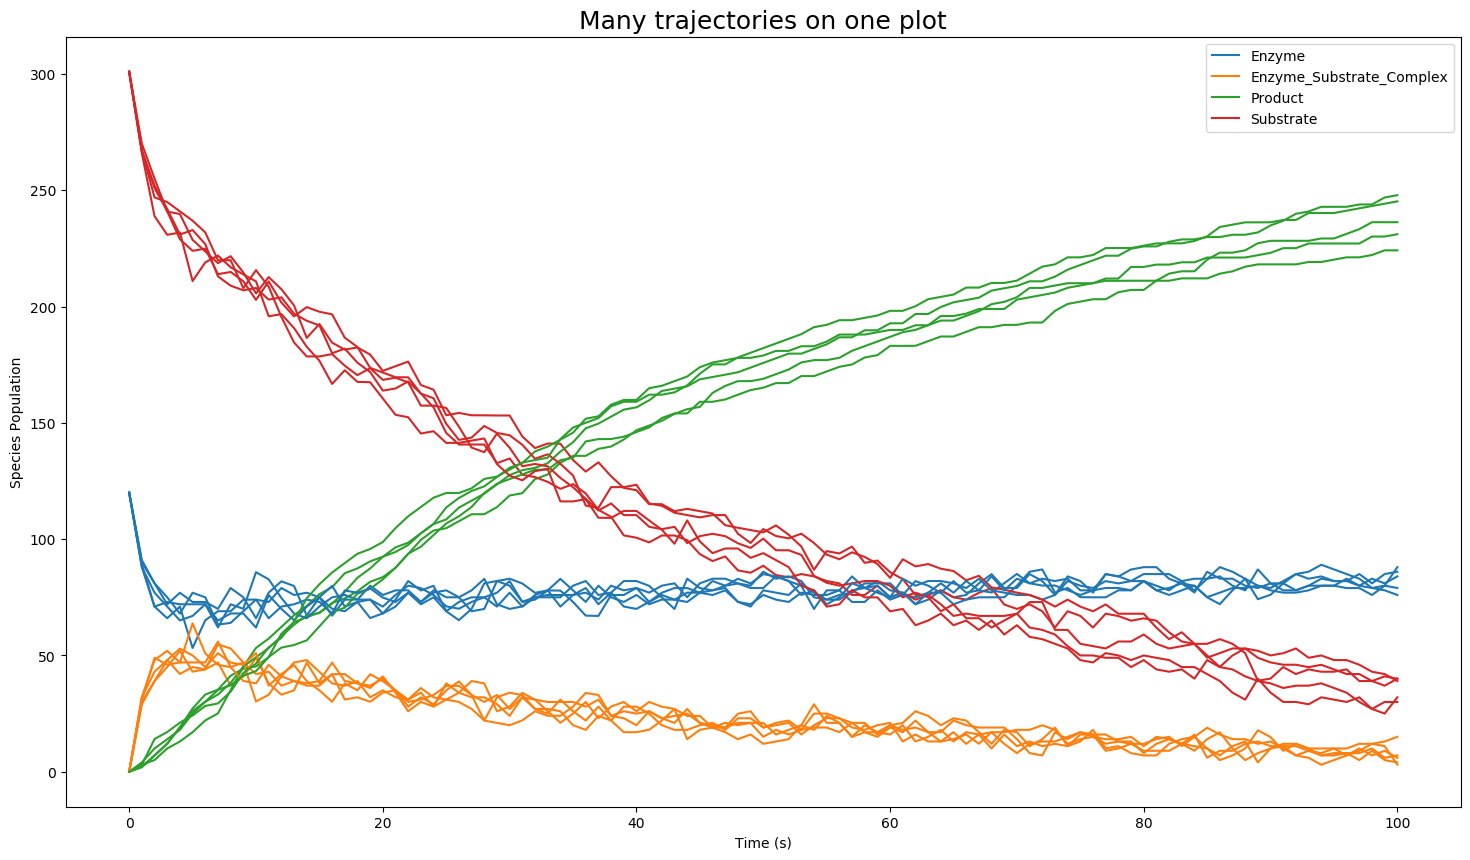

In [9]:
results_many_trajectories.plot(title="Many trajectories on one plot")

In [10]:
results_many_trajectories.plotplotly(title="Many trajectories on one plot")

EnsembleResults can use the average_ensemble function to create a single results dictionary of the average of the trajectories. 

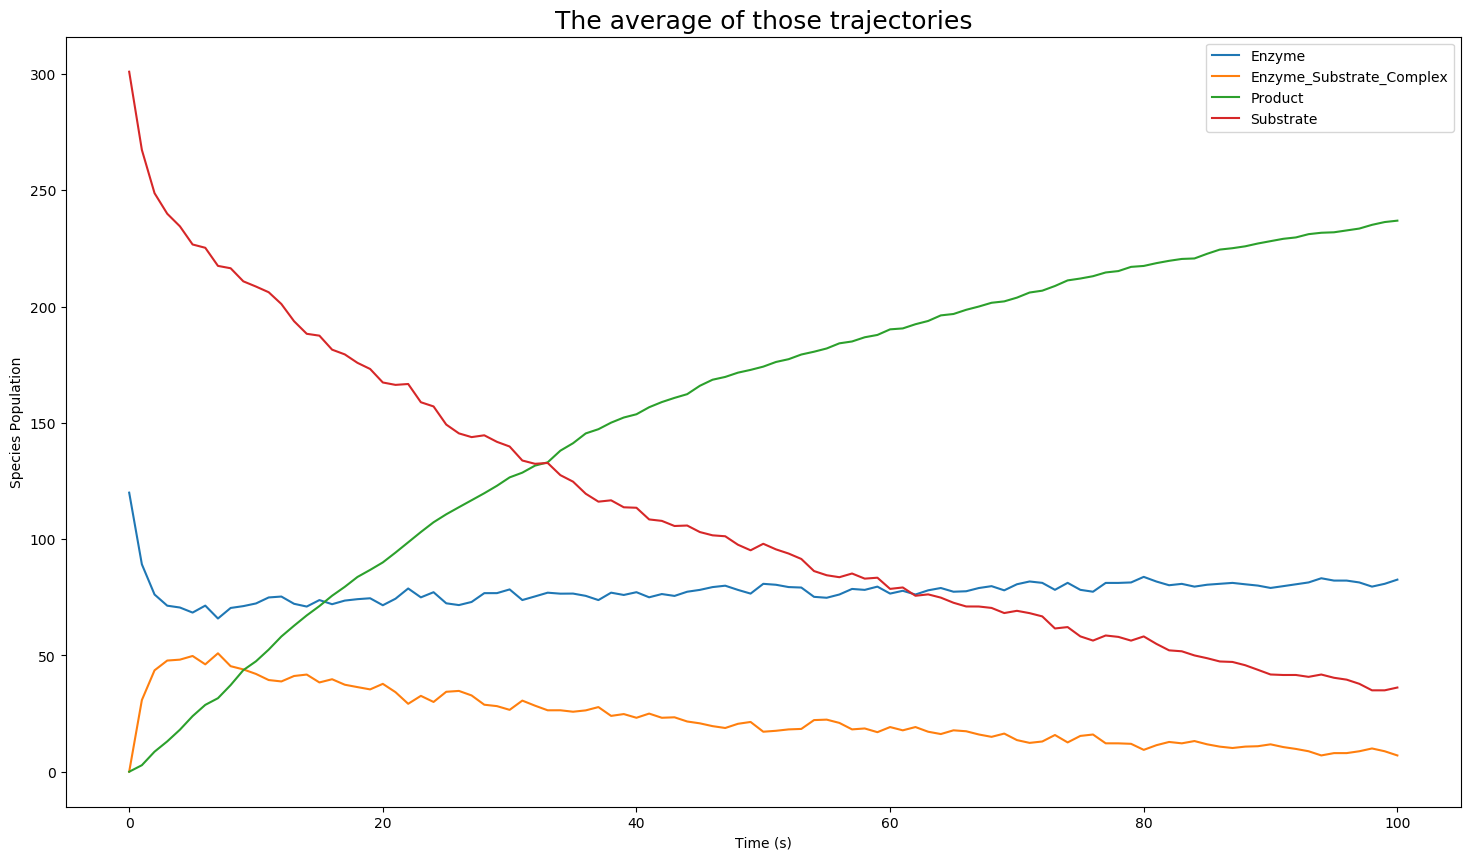

In [11]:
average_results = results_many_trajectories.average_ensemble()
average_results.plot(title="The average of those trajectories")

EnsembleResults can use the stddev_results function to create a single results dictionary of the standard deviation of the trajectories. 

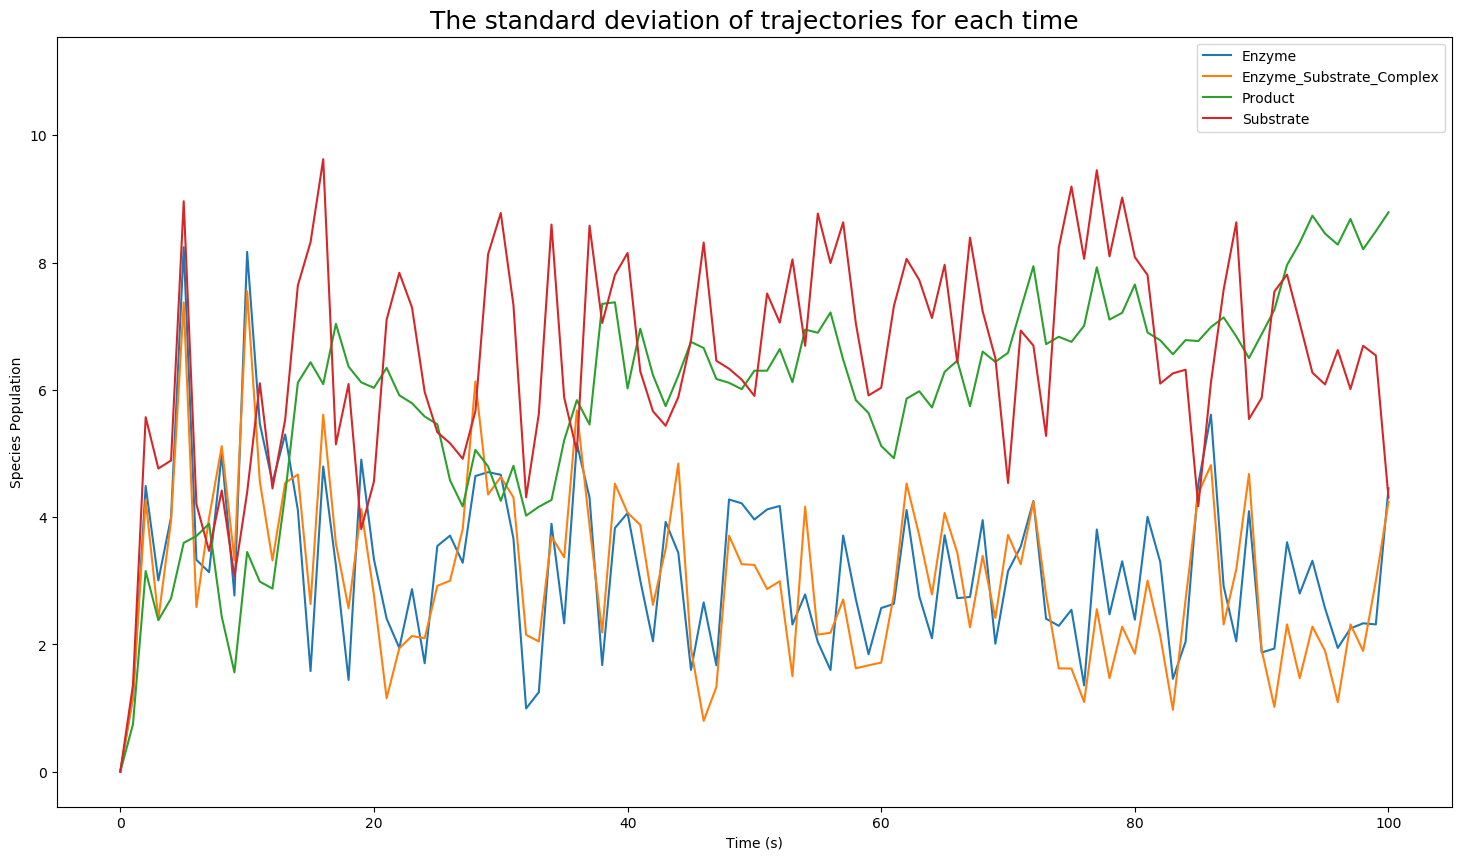

In [12]:
stddev_results = results_many_trajectories.stddev_ensemble()
stddev_results.plot(title="The standard deviation of trajectories for each time")

Standard deviation may also be visualized with the plot_std_dev_range() and plotplotly_std_dev_range()

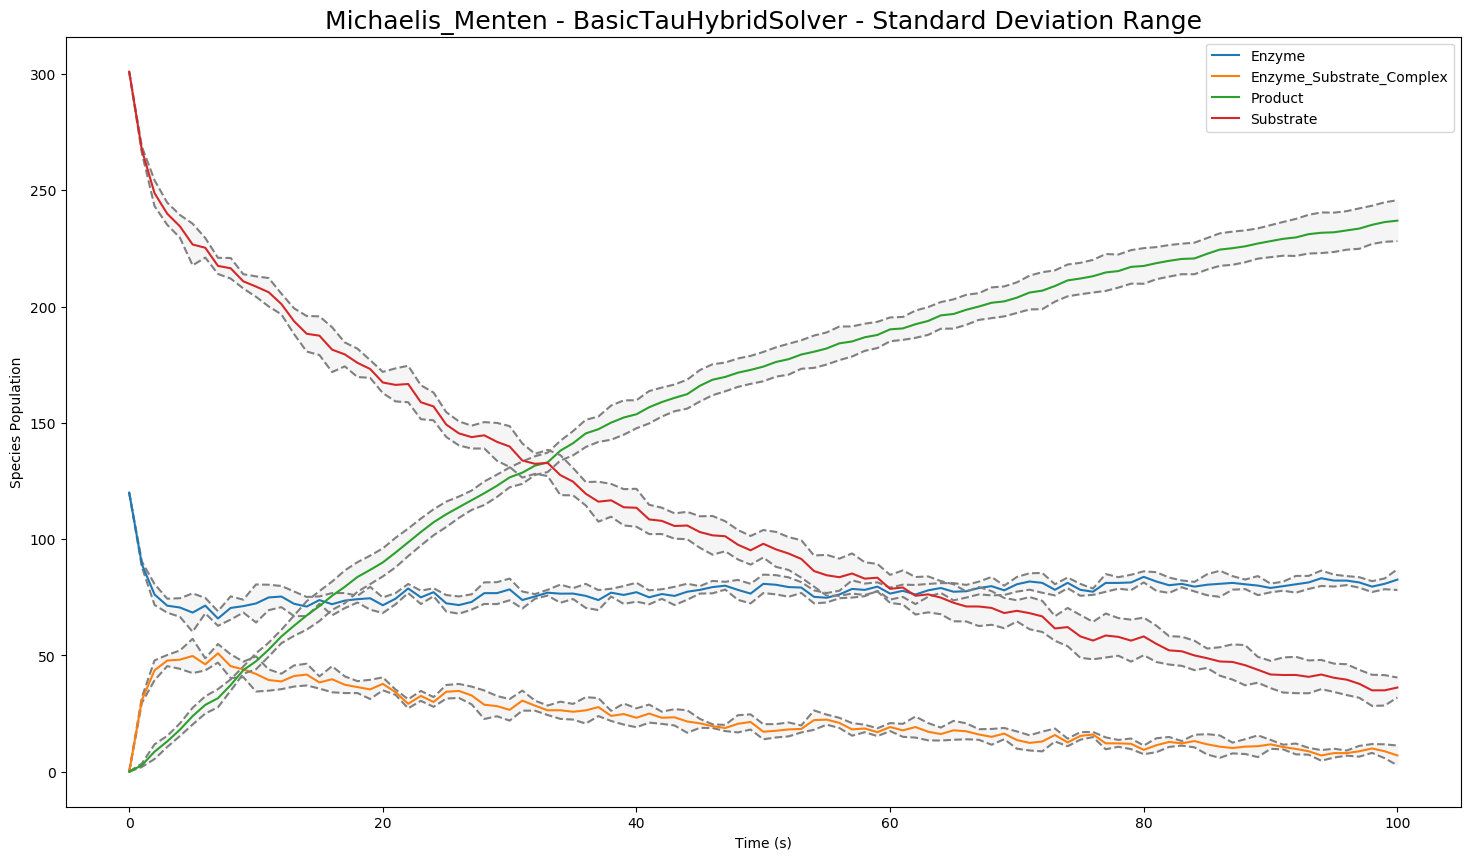

In [13]:
results_many_trajectories.plot_std_dev_range()


In [14]:
results_many_trajectories.plotplotly_std_dev_range()

Results objects are dictionaries which contain lists of species population data. Custom plots may be created using matplotlib.

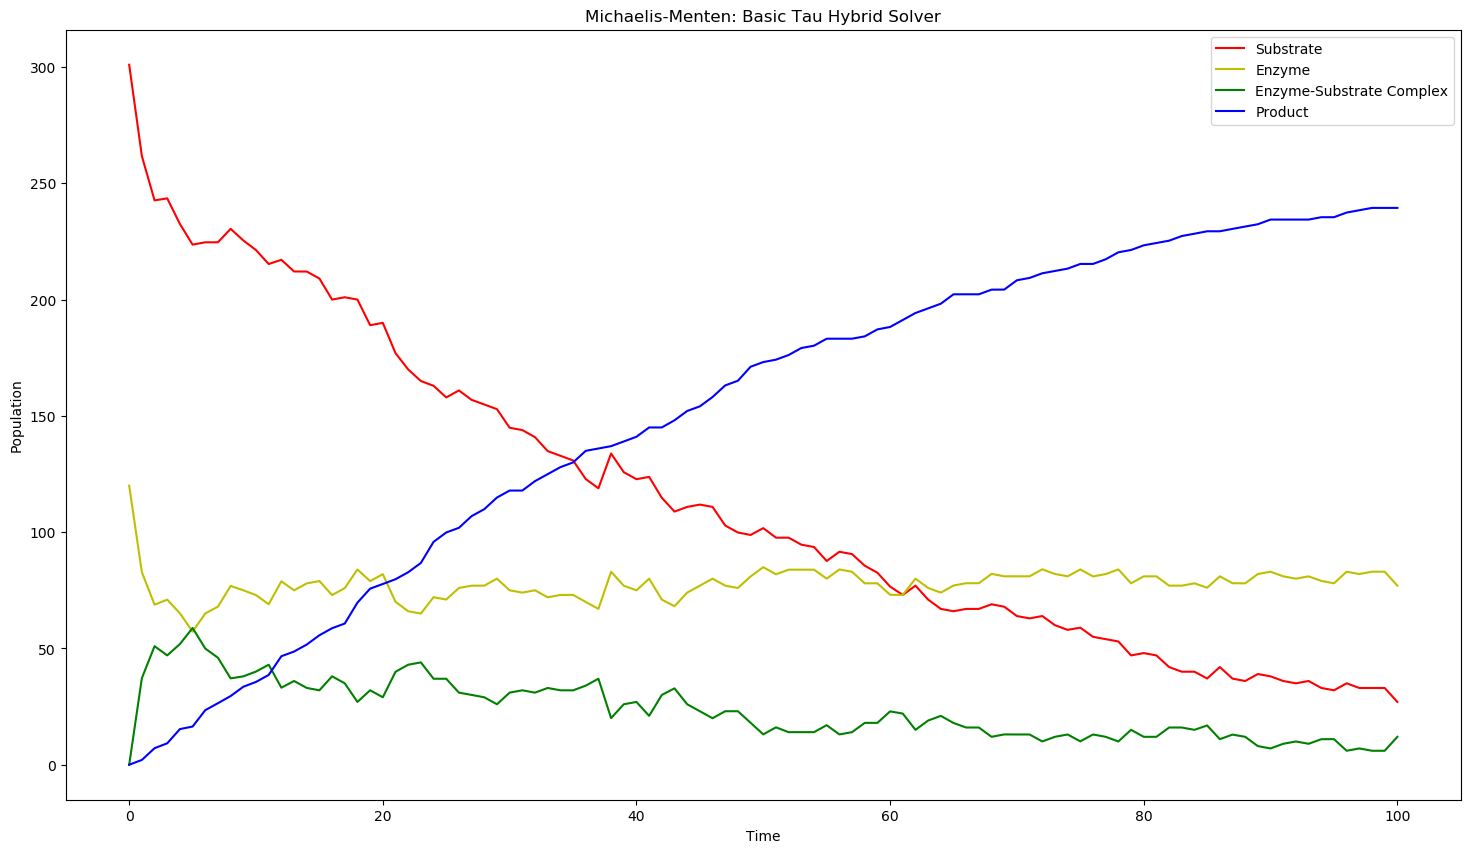

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plt.title("Michaelis-Menten: Basic Tau Hybrid Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results['time'],results['Substrate'],'r', label='Substrate')
plt.plot(results['time'],results['Enzyme'],'y', label='Enzyme')
plt.plot(results['time'],results['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['Product'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')